In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("milknew.csv")

In [4]:
df.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [5]:
dl=df.drop(['Grade'],axis=1)

In [6]:
dl.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [7]:
scalar=MinMaxScaler()
scalar.fit_transform(dl)
dt=scalar.transform(dl)

In [8]:
dt

array([[0.55384615, 0.01785714, 1.        , ..., 1.        , 0.        ,
        0.93333333],
       [0.55384615, 0.03571429, 0.        , ..., 0.        , 1.        ,
        0.86666667],
       [0.84615385, 0.64285714, 1.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.10714286, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.58461538, 0.16071429, 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.86153846, 0.375     , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [17]:
y=df['Colour']

In [18]:
y

0       254
1       253
2       246
3       255
4       255
       ... 
1054    247
1055    255
1056    255
1057    250
1058    255
Name: Colour, Length: 1059, dtype: int64

In [19]:
y1=pd.DataFrame(y)

In [20]:
y1

,Colour
0,254
1,253
2,246
3,255
4,255
...,...
1054,247
1055,255
1056,255
1057,250


In [21]:
alpha=0.0001

In [59]:
W= np.random.random((7,1))

In [60]:
W

array([[0.77972872],
       [0.46538241],
       [0.86552379],
       [0.95509717],
       [0.8277535 ],
       [0.26259028],
       [0.61901044]])

In [61]:
def signoid(z):return 1/(1+np.exp(-z))

In [62]:
def derv_signoid(z):return z*(1-z)

In [63]:
cost_hist=np.zeros((5,1))
for iter in range(5):
    z=np.dot(dt,W)
    h=signoid(z)
    
    error=y1-h
    dw= error*derv_signoid(h)
    
    W+= np.dot(dt.T,dw*alpha)
    cost_hist[iter] = np.sum(error)**2

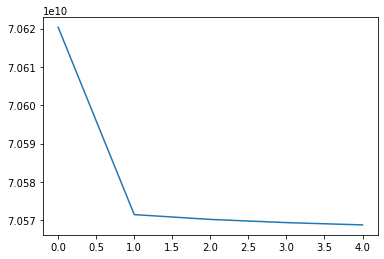

In [64]:
plt.plot(cost_hist)

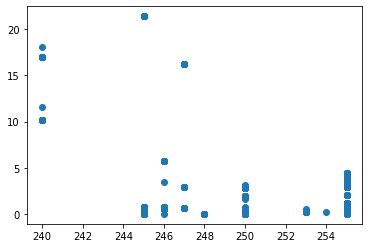

In [66]:
plt.scatter(y,dw)
plt.show()